# 0. Loading the Data

### 0.1 Land Cover dataset:

In [5]:
import geopandas as gpd
import os


# Algeria
# Define path to your shapefile folder
landcover_path = "../data/raw/Land Cover/geonetwork_landcover_DZA_gc_adg"

# Construct the shapefile path
shapefile_path = os.path.join(landcover_path, "dza_gc_adg.shp")

# Load the shapefile into a GeoDataFrame
gdf_landcover = gpd.read_file(shapefile_path)

# Display info
print("✅ Land Cover shapefile loaded successfully!")
print(gdf_landcover.shape)
print(gdf_landcover.head())
print(gdf_landcover.crs)


✅ Land Cover shapefile loaded successfully!
(386454, 5)
   ID  GRIDCODE          AREA       LCCCODE  \
0   4       210  6.228187e+06  7001 // 8001   
1   2       210  6.242408e+06  7001 // 8001   
2   1       210  1.482995e+06  7001 // 8001   
3   8        50  4.590841e+08  21497-121340   
4  13       210  6.371533e+06  7001 // 8001   

                                            geometry  
0  POLYGON ((6.41528 37.08696, 6.43103 37.0855, 6...  
1  POLYGON ((7.18084 37.07917, 7.17998 37.08091, ...  
2  POLYGON ((7.37137 37.08194, 7.3709 37.08717, 7...  
3  POLYGON ((6.12361 36.68472, 6.12361 36.69306, ...  
4  POLYGON ((6.26181 37.02361, 6.26193 37.02514, ...  
EPSG:4326


In [3]:
# Tunisia
# Define path to your shapefile folder
landcover_path = "../data/raw/Land Cover/geonetwork_landcover_tun_gc_adg"

# Construct the shapefile path
shapefile_path = os.path.join(landcover_path, "tun_gc_adg.shp")

# Load the shapefile into a GeoDataFrame
gdf_landcover = gpd.read_file(shapefile_path)

# Display info
print("✅ Land Cover shapefile loaded successfully!")
print(gdf_landcover.shape)
print(gdf_landcover.head())
print(gdf_landcover.crs)



✅ Land Cover shapefile loaded successfully!
(52059, 5)
     AREA_M2  ID  GRIDCODE                  LCCCode  \
0  3110936.0   1       210             7001 // 8001   
1   982723.0   3        20              0003 / 0004   
2   151388.0   2        30             0004 // 0003   
3   151391.0   6       120  21454 // 21446 // 21450   
4   151391.0   4        70             21499-121340   

                                            geometry  
0  POLYGON ((8.89941 37.52083, 8.89923 37.52117, ...  
1  POLYGON ((8.94028 37.52361, 8.94028 37.52917, ...  
2  POLYGON ((8.94583 37.53472, 8.94861 37.53472, ...  
3  POLYGON ((8.91528 37.52917, 8.91528 37.53194, ...  
4  POLYGON ((8.93194 37.53194, 8.9375 37.53194, 8...  
EPSG:4326


In [ ]:
import geopandas as gpd
import os

# combine the two landcover files (Algeria and Tunisia) into one GeoDataFrame
landcover_path_dza = "../data/raw/Land Cover/geonetwork_landcover_DZA_gc_adg/dza_gc_adg.shp"
landcover_path_tun = "../data/raw/Land Cover/geonetwork_landcover_tun_gc_adg/tun_gc_adg.shp"
gdf_landcover_dza = gpd.read_file(landcover_path_dza)
gdf_landcover_tun = gpd.read_file(landcover_path_tun)

gdf_landcover = gpd.pd.concat([gdf_landcover_dza, gdf_landcover_tun], ignore_index=True)
print("✅ Combined Land Cover shapefiles loaded successfully!")
print(gdf_landcover.shape)
print(gdf_landcover.head())

# save to a shapefile
gdf_landcover.to_file("../data/raw/Land Cover/combined/combined_landcover.shp")


✅ Combined Algeria–Tunisia shapefile loaded
CRS: EPSG:4326


<Axes: >

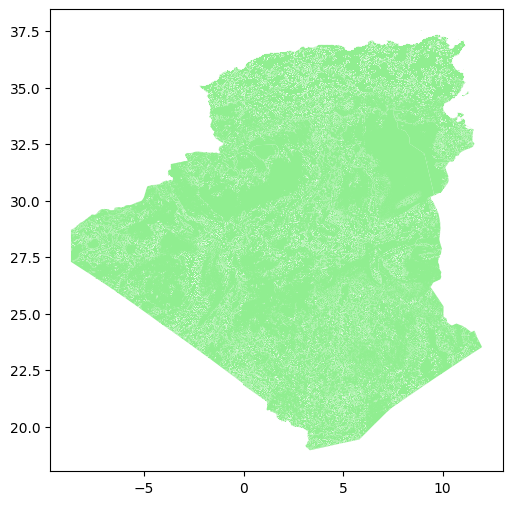

In [1]:
import geopandas as gpd

mask_path = "../data/raw/Land Cover/combined/combined_landcover.shp"
gdf_mask = gpd.read_file(mask_path)

print("✅ Combined Algeria–Tunisia shapefile loaded")
print("CRS:", gdf_mask.crs)
#gdf_mask.plot(edgecolor='black', color='lightgreen', figsize=(6,6))
gdf_mask.plot(color='lightgreen', figsize=(6,6))

### 0.2 Fire dataset:

In [3]:
# notebooks/01_load_fire_data.ipynb

import pandas as pd
import os

# Define the path to your fire data folder
fire_data_path = "../data/raw/Fire"

# List all CSV files in that folder
csv_files = [f for f in os.listdir(fire_data_path) if f.endswith('.csv')]

# Load each file into a dictionary of DataFrames
fire_datasets = {}

for file in csv_files:
    country_name = file.replace('_fire_2024.csv', '').capitalize()
    file_path = os.path.join(fire_data_path, file)
    df = pd.read_csv(file_path)
    fire_datasets[country_name] = df
    print(f"✅ Loaded {country_name} dataset with shape {df.shape}")

# Optional: inspect the first few rows of each dataset
for country, df in fire_datasets.items():
    print(f"\n--- {country} ---")
    print(df.head(3))
    print("---------------------------------------------------")


✅ Loaded Algeria dataset with shape (87446, 15)
✅ Loaded Tunisia dataset with shape (2804, 15)

--- Algeria ---
   latitude  longitude  bright_ti4  scan  track    acq_date  acq_time  \
0  27.72818    9.87200      295.51  0.76   0.77  2024-01-01         3   
1  28.63288    9.77909      301.80  0.79   0.78  2024-01-01         3   
2  28.64012    9.77953      298.65  0.79   0.78  2024-01-01         3   

  satellite instrument confidence  version  bright_ti5   frp daynight  type  
0       N20      VIIRS          n        2      277.66  1.24        N     2  
1       N20      VIIRS          n        2      277.05  1.57        N     2  
2       N20      VIIRS          n        2      277.04  1.34        N     2  
---------------------------------------------------

--- Tunisia ---
   latitude  longitude  bright_ti4  scan  track    acq_date  acq_time  \
0  31.64847    9.16945      315.79  0.53   0.50  2024-01-01       142   
1  31.49290    9.48947      302.32  0.56   0.51  2024-01-01       14

In [5]:
# merge all fire datasets into a single DataFrame
fire_data_combined = pd.concat(fire_datasets.values(), ignore_index=True)
print("✅ Combined fire dataset shape:", fire_data_combined.shape)

# save to a CSV file
fire_data_combined.to_csv("../data/processed/Fire/combined_fire_data_2024.csv", index=False)

✅ Combined fire dataset shape: (90250, 15)


   latitude  longitude  bright_ti4  scan  track    acq_date  acq_time  \
0  27.72818    9.87200      295.51  0.76   0.77  2024-01-01         3   
1  28.63288    9.77909      301.80  0.79   0.78  2024-01-01         3   
2  28.64012    9.77953      298.65  0.79   0.78  2024-01-01         3   
3  36.74886    6.25409      338.04  0.46   0.39  2024-01-01       141   
4  35.87978    4.44782      309.49  0.41   0.37  2024-01-01       141   

  satellite instrument confidence  version  bright_ti5   frp daynight  type  
0       N20      VIIRS          n        2      277.66  1.24        N     2  
1       N20      VIIRS          n        2      277.05  1.57        N     2  
2       N20      VIIRS          n        2      277.04  1.34        N     2  
3       N20      VIIRS          n        2      257.28  5.21        N     2  
4       N20      VIIRS          n        2      272.08  1.58        N     2  


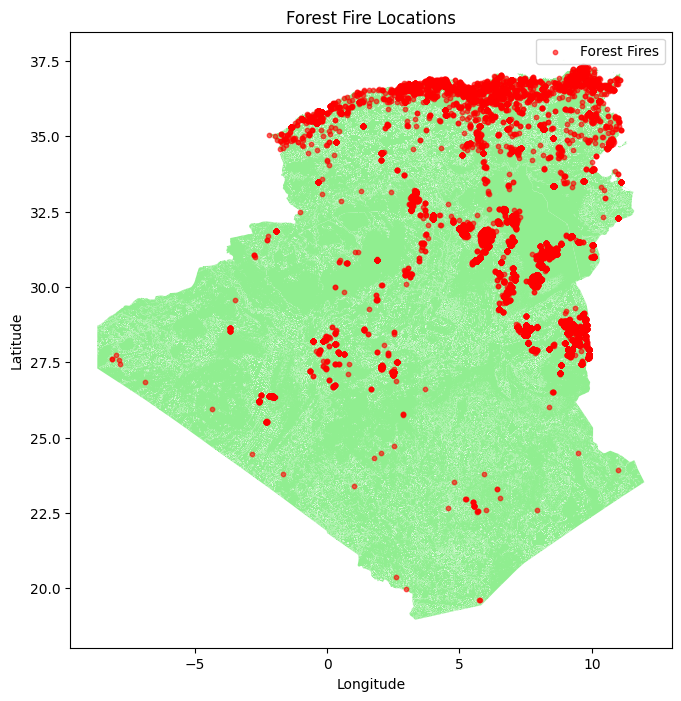

In [6]:
# plot the fire data on a map

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

def plot_fires(fires_csv, shapefile):
    df = pd.read_csv(fires_csv)

    print(df.head())

    gdf_fires = gpd.GeoDataFrame(
        df,
        geometry=gpd.points_from_xy(df.longitude, df.latitude),
        crs="EPSG:4326"  # WGS84 (lat/lon)
    )
    gdf_algeria = gpd.read_file(shapefile)

    if gdf_fires.crs != gdf_algeria.crs:
        gdf_fires = gdf_fires.to_crs(gdf_algeria.crs)

    fig, ax = plt.subplots(figsize=(8, 8))
    gdf_algeria.plot(ax=ax, color='lightgreen')
    gdf_fires.plot(ax=ax, color='red', markersize=10, alpha=0.6, label='Forest Fires')

    plt.title("Forest Fire Locations")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.legend()
    plt.show()

# Example usage for Algeria
fires_csv = "../data/processed/Fire/combined_fire_data_2024.csv"
shapefile = "../data/raw/Land Cover/combined/combined_landcover.shp"
plot_fires(fires_csv, shapefile)

### 0.3 Climate dataset:

✅ File loaded successfully!
Name: ../data/raw/Climate/wc2.1_cruts4.09_5m_prec_2020-2024\wc2.1_cruts4.09_5m_prec_2020-01.tif
Shape: (2160, 4320)
CRS: EPSG:4326
Bounds: BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


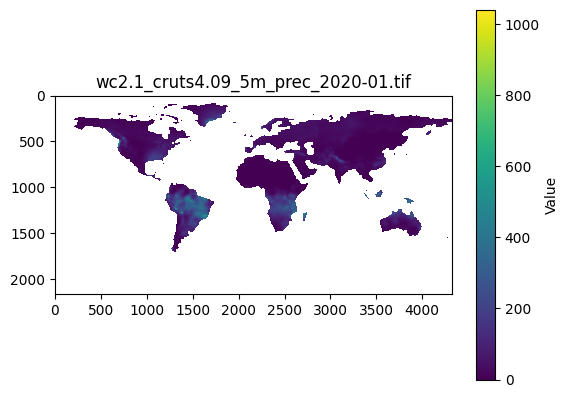


 ---------------------------------------------------
 
✅ File loaded successfully!
Name: ../data/raw/Climate/wc2.1_cruts4.09_5m_tmax_2020-2024\wc2.1_cruts4.09_5m_tmax_2020-01.tif
Shape: (2160, 4320)
CRS: EPSG:4326
Bounds: BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


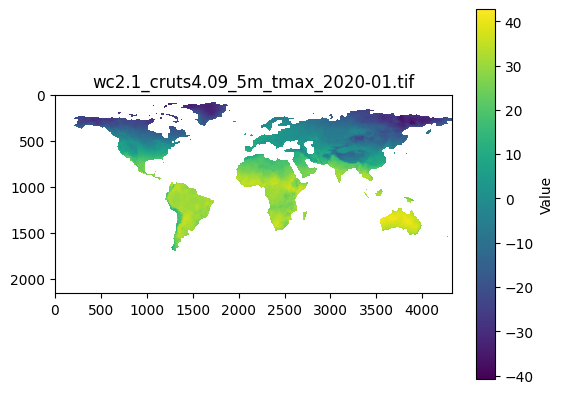


 ---------------------------------------------------
 
✅ File loaded successfully!
Name: ../data/raw/Climate/wc2.1_cruts4.09_5m_tmin_2020-2024\wc2.1_cruts4.09_5m_tmin_2020-01.tif
Shape: (2160, 4320)
CRS: EPSG:4326
Bounds: BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


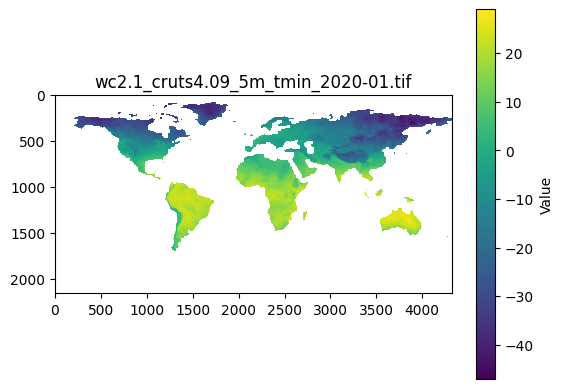


 ---------------------------------------------------
 


In [ ]:
import rasterio
import os
import matplotlib.pyplot as plt

# Path to precipitation folder
climate_prec_path = "../data/raw/Climate/wc2.1_cruts4.09_5m_prec_2020-2024"
climate_tmax_path = "../data/raw/Climate/wc2.1_cruts4.09_5m_tmax_2020-2024"
climate_tmin_path = "../data/raw/Climate/wc2.1_cruts4.09_5m_tmin_2020-2024"

# List all .tif files
tif_prec_files = [f for f in os.listdir(climate_prec_path) if f.endswith('.tif')]
tif_tmax_files = [f for f in os.listdir(climate_tmax_path) if f.endswith('.tif')]
tif_tmin_files = [f for f in os.listdir(climate_tmin_path) if f.endswith('.tif')]

# Load the first file
tif_prec_path = os.path.join(climate_prec_path, tif_prec_files[0])
tif_tmax_path = os.path.join(climate_tmax_path, tif_tmax_files[0])
tif_tmin_path = os.path.join(climate_tmin_path, tif_tmin_files[0])

#file_paths = [tif_prec_path, tif_tmax_path, tif_tmin_path]
file_paths = [tif_tmax_path]

for path in file_paths:

    with rasterio.open(path) as src:
        print("✅ File loaded successfully!")
        print("Name:", src.name)
        print("Shape:", src.shape)          # (height, width)
        print("CRS:", src.crs)              # Coordinate system
        print("Bounds:", src.bounds)        # Geographic extent

        # Read the data (2D array)
        data = src.read(1)

    # Display the raster
    plt.imshow(data, cmap='viridis')
    plt.title(os.path.basename(path))
    plt.colorbar(label='Value')
    plt.show()

    print("\n ---------------------------------------------------\n ")


In [ ]:
# climate 

import rasterio
from rasterio.mask import mask
import os

# Path to raw and output folders
climate_base_path = "../data/raw/Climate"
climate_output_path = "../data/processed/Climate"
os.makedirs(climate_output_path, exist_ok=True)

# List of variables to process
#variables = ["wc2.1_cruts4.09_5m_prec_2020-2024", "wc2.1_cruts4.09_5m_tmax_2020-2024", "wc2.1_cruts4.09_5m_tmin_2020-2024"]
variables = ["wc2.1_cruts4.09_5m_tmin_2020-2024"]

for var in variables:
    print(f"Processing variable: {var.upper()}")
    var_dir = [f for f in os.listdir(climate_base_path) if var in f][0]
    var_path = os.path.join(climate_base_path, var_dir)
    
    for tif_file in os.listdir(var_path):

        if not tif_file.endswith(".tif"):
            continue
        
        input_tif = os.path.join(var_path, tif_file)
        output_tif = os.path.join(climate_output_path, tif_file.replace(".tif", "_clipped.tif"))
        
        # Clip
        with rasterio.open(input_tif) as src:
            out_image, out_transform = mask(src, gdf_mask.geometry, crop=True)
            out_meta = src.meta.copy()
            out_meta.update({
                "driver": "GTiff",
                "height": out_image.shape[1],
                "width": out_image.shape[2],
                "transform": out_transform
            })
            
        with rasterio.open(output_tif, "w", **out_meta) as dest:
            dest.write(out_image)
        
        print(f"✅ Clipped {var.upper()} file saved:", output_tif)


Processing variable: WC2.1_CRUTS4.09_5M_TMAX_2020-2024
✅ Clipped WC2.1_CRUTS4.09_5M_TMAX_2020-2024 file saved: ../data/processed/Climate\wc2.1_cruts4.09_5m_tmax_2020-01_clipped.tif
✅ Clipped WC2.1_CRUTS4.09_5M_TMAX_2020-2024 file saved: ../data/processed/Climate\wc2.1_cruts4.09_5m_tmax_2020-02_clipped.tif
✅ Clipped WC2.1_CRUTS4.09_5M_TMAX_2020-2024 file saved: ../data/processed/Climate\wc2.1_cruts4.09_5m_tmax_2020-03_clipped.tif
✅ Clipped WC2.1_CRUTS4.09_5M_TMAX_2020-2024 file saved: ../data/processed/Climate\wc2.1_cruts4.09_5m_tmax_2020-04_clipped.tif
✅ Clipped WC2.1_CRUTS4.09_5M_TMAX_2020-2024 file saved: ../data/processed/Climate\wc2.1_cruts4.09_5m_tmax_2020-05_clipped.tif
✅ Clipped WC2.1_CRUTS4.09_5M_TMAX_2020-2024 file saved: ../data/processed/Climate\wc2.1_cruts4.09_5m_tmax_2020-06_clipped.tif
✅ Clipped WC2.1_CRUTS4.09_5M_TMAX_2020-2024 file saved: ../data/processed/Climate\wc2.1_cruts4.09_5m_tmax_2020-07_clipped.tif
✅ Clipped WC2.1_CRUTS4.09_5M_TMAX_2020-2024 file saved: ../data

KeyboardInterrupt: 

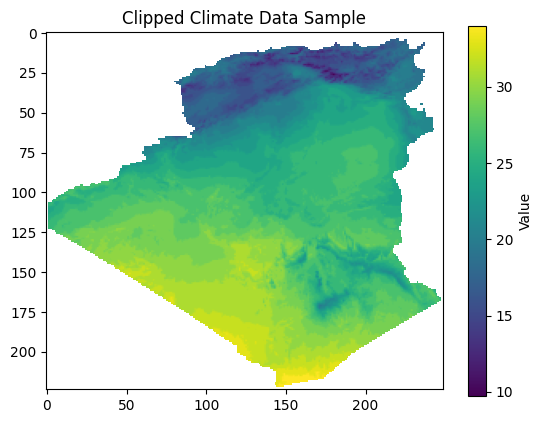

In [8]:
# display clipped climate data
import rasterio
import matplotlib.pyplot as plt

clipped_sample = "../data/processed/Climate/wc2.1_cruts4.09_5m_tmax_2022-03_clipped.tif"

with rasterio.open(clipped_sample) as src:
    data = src.read(1)
    plt.imshow(data, cmap='viridis')
    plt.title("Clipped Climate Data Sample")
    plt.colorbar(label='Value')
    plt.show()

### 0.4 Elevation dataset:

In [9]:
# print the contents of the folder 
import os
# Define path to the elevation shapefile
elevation_path = "../data/raw/Elevation/be15_grd/info/"

for item in os.listdir(elevation_path):
    print(item)

arc.dir
arc0000.dat
arc0000.nit
arc0001.dat
arc0001.nit
arc0002.dat
arc0002.nit


✅ Elevation raster loaded successfully
CRS: EPSG:4326
Shape (rows, cols): 33600 86400
Bounds: BoundingBox(left=-180.00013888888893, bottom=-56.00013888888891, right=179.99986111111085, top=83.999861111111)
Data type: ('int16',)


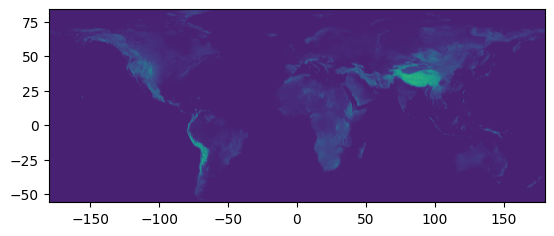

In [11]:
import rasterio
from rasterio.plot import show

elevation_path = "../data/raw/Elevation/be15_grd/be15_grd"

with rasterio.open(elevation_path) as src:
    print("✅ Elevation raster loaded successfully")
    print("CRS:", src.crs)
    print("Shape (rows, cols):", src.height, src.width)
    print("Bounds:", src.bounds)
    print("Data type:", src.dtypes)
    
    # Optional: display
    show(src)


In [ ]:
# Elevation 
import rasterio
from rasterio.mask import mask

elev_in = "../data/raw/Elevation/be15_grd/be15_grd"
elev_out = "../data/processed/Elevation/elevation_clipped.tif"

with rasterio.open(elev_in) as src:
    out_image, out_transform = mask(src, gdf_mask.geometry, crop=True)
    out_meta = src.meta.copy()
    out_meta.update({
        "driver": "GTiff",
        "height": out_image.shape[1],
        "width": out_image.shape[2],
        "transform": out_transform
    })

with rasterio.open(elev_out, "w", **out_meta) as dest:
    dest.write(out_image)

print("✅ Clipped elevation raster saved:", elev_out)




✅ Clipped elevation raster saved: ../data/processed/Elevation/elevation_clipped.tif


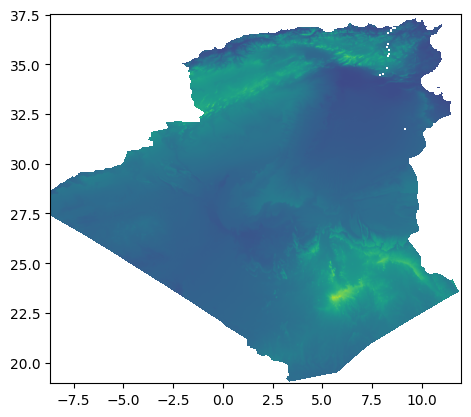

'with rasterio.open(clipped_elev_path) as src:\n    data = src.read(1)\n    plt.imshow(data, cmap=\'terrain\')\n    plt.title("Clipped Elevation Data")\n    plt.colorbar(label=\'Elevation (m)\')\n    plt.show()'

In [11]:
# show clipped elevation data
import rasterio
import matplotlib.pyplot as plt
from rasterio.plot import show

clipped_elev_path = "../data/processed/Elevation/elevation_clipped.tif"
with rasterio.open(clipped_elev_path) as src:
    show(src)

"""with rasterio.open(clipped_elev_path) as src:
    data = src.read(1)
    plt.imshow(data, cmap='terrain')
    plt.title("Clipped Elevation Data")
    plt.colorbar(label='Elevation (m)')
    plt.show()"""

### 0.5 Soil dataset:

In [3]:
import pandas as pd
import pyodbc

# Path to your MDB file
mdb_path = r"../data/raw/Soil/HWSD2_DB/HWSD2.mdb"

# Connection string (for Access Database)
conn_str = (
    r"DRIVER={Microsoft Access Driver (*.mdb, *.accdb)};"
    f"DBQ={mdb_path};"
)

conn = pyodbc.connect(conn_str)

# List all tables in the database
tables = [t.table_name for t in conn.cursor().tables(tableType='TABLE')]
print("Tables found:", tables)

# Example: read main soil data
df_soil = pd.read_sql("SELECT * FROM HWSD2_LAYERS", conn)

print("✅ Soil data loaded successfully!")
print(df_soil.shape)
print(df_soil.head())

# save to a CSV file
df_soil.to_csv("../data/processed/Soil/soil_data_layers.csv", index=False)


conn.close()


Tables found: ['D_ADD_PROP', 'D_AWC', 'D_COVERAGE', 'D_DRAINAGE', 'D_FAO90', 'D_IL', 'D_KOPPEN', 'D_PHASE', 'D_ROOT_DEPTH', 'D_ROOTS', 'D_SWR', 'D_TEXTURE', 'D_TEXTURE_SOTER', 'D_TEXTURE_USDA', 'D_WRB_PHASES', 'D_WRB2', 'D_WRB2code', 'D_WRB4', 'HWSD2_LAYERS', 'HWSD2_LAYERS_METADATA', 'HWSD2_SMU', 'HWSD2_SMU_METADATA', 'WRB_Class', 'WRB_Layer', 'WRB_Library']


C:\Users\lemon\AppData\Local\Temp\ipykernel_18620\4013993029.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_soil = pd.read_sql("SELECT * FROM HWSD2_LAYERS", conn)


✅ Soil data loaded successfully!
(408835, 48)
   ID  HWSD2_SMU_ID NSC_MU_SOURCE1 NSC_MU_SOURCE2 WISE30s_SMU_ID  \
0   1          1666           None           None     WD10001666   
1   2          6309           None           None     WD10006309   
2   3          1700           None           None     WD10001700   
3   4          6310           None           None     WD10006310   
4   5          6311           None           None     WD10006311   

   HWSD1_SMU_ID  COVERAGE  SEQUENCE  SHARE   NSC  ... CEC_SOIL CEC_CLAY  \
0          1666         4         1     70  None  ...        8       50   
1          6309         4         1     50  None  ...        8       50   
2          1700         4         1     60  None  ...        8       50   
3          6310         4         1     30  None  ...        8       50   
4          6311         4         1     50  None  ...        8       50   

  CEC_EFF  TEB  BSAT  ALUM_SAT  ESP  TCARBON_EQ  GYPSUM  ELEC_COND  
0     4.0  5.0    71     

In [17]:
df_soil = pd.read_csv("../data/processed/Soil/soil_data_layers.csv")

df_soil.head()
print("number of rows before filtering:", len(df_soil))

#Only keep the values of LAYER = D1 (which means the characteristics of the first 20cm depth of the soil.
df_soil = df_soil[df_soil['LAYER'] == 'D1']
print("number of rows after filtering:", len(df_soil))

# Extract the features: “COARSE”, “SAND”, “SILT”, “CLAY”, “TEXTURE_USDA”,“TEXTURE_SOTER”, BULK”, “REF_BULK”, “ORG_CARBON”, “PH_WATER”,“TOTAL_N”, “CN_RATIO”, “CEC_SOIL”, “CEC_CLAY”, “CEC_EFF”, “TEB”, “BSAT”,“ALUM_SAT”, “ESP”, “TCARBON_EQ”, “GYPSUM”, “ELEC_COND”.
features = ["COARSE", "SAND", "SILT", "CLAY", "TEXTURE_USDA", "TEXTURE_SOTER", "BULK", "REF_BULK", "ORG_CARBON", "PH_WATER", "TOTAL_N", "CN_RATIO", "CEC_SOIL", "CEC_CLAY", "CEC_EFF", "TEB", "BSAT", "ALUM_SAT", "ESP", "TCARBON_EQ", "GYPSUM", "ELEC_COND"]
df_soil_features = df_soil[features + ['ID']]

df_soil = df_soil_features
df_soil.head()


# save to a CSV file
df_soil.to_csv("../data/processed/Soil/soil_data_layers_filtered.csv", index=False)


C:\Users\lemon\AppData\Local\Temp\ipykernel_18620\3848796748.py:1: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_soil = pd.read_csv("../data/processed/Soil/soil_data_layers.csv")


number of rows before filtering: 408835
number of rows after filtering: 58405
